<center>
## МАТЕМАТИЧЕСКИЙ АППАРАТ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
plt.rc('font', family='Verdana')

In [140]:
data = pd.read_csv("C:/Trees/Bankloan.csv", encoding='cp1251', sep=';')
data.head()

,age,employ,address,debtinc,creddebt,default
0,28,7,2,"17,7","2,990592",0
1,64,34,17,"14,7","5,047392",0
2,40,20,12,"4,8","1,042368",0
3,30,11,3,"34,5","1,75122",0
4,25,2,2,"22,4","0,75936",1


In [141]:
for i in ['debtinc', 'creddebt']:
    if i in data.columns:
        data[i]=data[i].str.replace(',', '.').astype('float')

In [142]:
data.head()

,age,employ,address,debtinc,creddebt,default
0,28,7,2,17.7,2.990592,0
1,64,34,17,14.7,5.047392,0
2,40,20,12,4.8,1.042368,0
3,30,11,3,34.5,1.751220,0
4,25,2,2,22.4,0.759360,1


In [143]:
data['default']=data['default'].astype('object')

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
age         1500 non-null int64
employ      1500 non-null int64
address     1500 non-null int64
debtinc     1500 non-null float64
creddebt    1500 non-null float64
default     1500 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 70.4+ KB


In [145]:
print("Исходные переменные:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Переменные после get_dummies:\n", list(data_dummies.columns))

Исходные переменные:
 ['age', 'employ', 'address', 'debtinc', 'creddebt', 'default'] 

Переменные после get_dummies:
 ['age', 'employ', 'address', 'debtinc', 'creddebt', 'default_0', 'default_1']


In [146]:
y = data_dummies.loc[:, 'default_1']
data_dummies.drop('default_0', axis=1, inplace=True)
data_dummies.drop('default_1', axis=1, inplace=True)
X = data_dummies.loc[:, 'age':'creddebt']

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [148]:
# применяем RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# строим модель логистической регрессии на данных,
# отмасштабированных с помощью RobustScaler
logreg = LogisticRegression().fit(X_train_scaled, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])))

AUC на обучающей выборке: 0.848
AUC на контрольной выборке: 0.832


In [149]:
logreg.coef_

array([[-0.56889341, -2.20105503, -0.01326422,  0.8788113 ,  0.87526835]])

In [150]:
coef=logreg.coef_
feat_labels = X.columns

In [151]:
for c, feature in zip(coef[0], feat_labels):
    print(feature, c)

age -0.568893408455
employ -2.20105502509
address -0.0132642226832
debtinc 0.878811302173
creddebt 0.875268353245


In [152]:
exp_coef=np.exp(coef)
exp_coef

array([[ 0.56615159,  0.11068632,  0.98682336,  2.40803558,  2.39951913]])

In [153]:
for c, feature in zip(exp_coef[0], feat_labels):
    print(feature, c)

age 0.566151590752
employ 0.110686319895
address 0.986823359455
debtinc 2.40803557781
creddebt 2.39951912632


In [154]:
intercept=logreg.intercept_
intercept

array([-0.89234106])

In [115]:
predvalue = logreg.predict(X_train_scaled)
predvalue

array([1, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [116]:
predvalue=pd.DataFrame(predvalue, index=X_train.index, columns=['Predicted_class'])
predvalue.head()

,Predicted_class
485,1
527,0
199,0
889,0
844,1


In [117]:
prob = logreg.predict_proba(X_train_scaled)
prob

array([[ 0.49565917,  0.50434083],
       [ 0.77963554,  0.22036446],
       [ 0.64022823,  0.35977177],
       ..., 
       [ 0.23357302,  0.76642698],
       [ 0.95415838,  0.04584162],
       [ 0.97300933,  0.02699067]])

In [118]:
probabilities=pd.DataFrame(prob, index=X_train.index, columns=['Prob0', 'Prob1'])
probabilities.head()

,Prob0,Prob1
485,0.495659,0.504341
527,0.779636,0.220364
199,0.640228,0.359772
889,0.798713,0.201287
844,0.429674,0.570326


In [119]:
X_tr=pd.DataFrame(X_train_scaled, index=X_train.index, columns=feat_labels)
X_tr.head()

,age,employ,address,debtinc,creddebt
485,-0.555556,-0.3,-0.571429,-0.022989,-0.061742
527,-0.166667,0.0,0.000000,-0.287356,-0.243909
199,0.111111,0.0,-0.142857,0.091954,0.338743
889,2.222222,-0.2,1.142857,0.160920,0.241992
844,-0.611111,-0.4,-0.571429,0.126437,-0.195654


In [120]:
result=pd.concat([X_tr, y_train, predvalue, probabilities], axis=1)
result.head()

,age,employ,address,debtinc,creddebt,default_1,Predicted_class,Prob0,Prob1
485,-0.555556,-0.3,-0.571429,-0.022989,-0.061742,0,1,0.495659,0.504341
527,-0.166667,0.0,0.000000,-0.287356,-0.243909,0,0,0.779636,0.220364
199,0.111111,0.0,-0.142857,0.091954,0.338743,0,0,0.640228,0.359772
889,2.222222,-0.2,1.142857,0.160920,0.241992,0,0,0.798713,0.201287
844,-0.611111,-0.4,-0.571429,0.126437,-0.195654,0,1,0.429674,0.570326


Давайте вручную вычислим вероятность дефолта для наблюдения 485. 

Подставляем в формулу

$$\Large \frac{1}{1+e^{-(b_0+b_1x_i^{(1)}+b_2x_i^{(2)}+...+b_kx_i^{(k)})}}$$ 

коэффициенты и значения предикторов для данного наблюдения.

<img src='../img/Prob_logreg.png'>


Найденное значение практически совпадает со значением вероятности дефолта, вычисленным автоматически (0.504341). Небольшое различие обусловлено ошибкой округления.

In [123]:
# из модуля sklearn.metrics импортируем функцию confusion_matrix
from sklearn.metrics import confusion_matrix
# вычисляем матрицу ошибок, передав функции confusion_matrix в качестве аргументов 
# фактические значения зависимой переменной, записанные в y_train, и спрогнозированные 
# значения зависимой переменной, записанные в predvalue
confusion = confusion_matrix(y_train, predvalue)
# Печатаем матрицу ошибок
print("Матрица ошибок:\n{}".format(confusion))

Матрица ошибок:
[[591  84]
 [155 220]]


In [9]:
from catboost import CatBoostClassifier
boost = CatBoostClassifier(iterations=100, learning_rate=0.08, depth=5, random_seed=42, eval_metric='AUC')
boost.fit(X_train, y_train)
print("AUC на обучающей выборке: {:.3f}".format(roc_auc_score(y_train, boost.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".format(roc_auc_score(y_control, boost.predict_proba(X_control)[:, 1])))

AUC на обучающей выборке: 0.906
AUC на контрольной выборке: 0.815


In [10]:
from sklearn.model_selection import StratifiedKFold
strat = StratifiedKFold(n_splits=5, shuffle=True)

# Создаем списки для сохранения AUC на обучающей и контрольной выборках
train_auc = []
test_auc = []
temp_train_auc = []
temp_test_auc = []
iterations_grid = [40, 60, 80, 100, 120, 140]

# Строим модели с разным количеством деревьев
for ntrees in iterations_grid:
    cat = CatBoostClassifier(iterations=ntrees, random_seed=42, eval_metric='AUC')
    temp_train_auc = []
    temp_test_auc = []
    for train_index, test_index in strat.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        cat.fit(X_train, y_train)
        temp_train_auc.append(roc_auc_score(y_train, cat.predict_proba(X_train)[:, 1]))
        temp_test_auc.append(roc_auc_score(y_test, cat.predict_proba(X_test)[:, 1]))
    train_auc.append(temp_train_auc)
    test_auc.append(temp_test_auc)

# Преобразуем списки в массивы NumPy
train_auc, test_auc = np.asarray(train_auc), np.asarray(test_auc)
print("Наилучшее значение AUC перекрестной проверки равно {:.3f} и достигается при {} деревьях".format(max(test_auc.mean(axis=1)), 
                                                        iterations_grid[np.argmax(test_auc.mean(axis=1))]))

Наилучшее значение AUC перекрестной проверки равно 0.826 и достигается при 120 деревьях


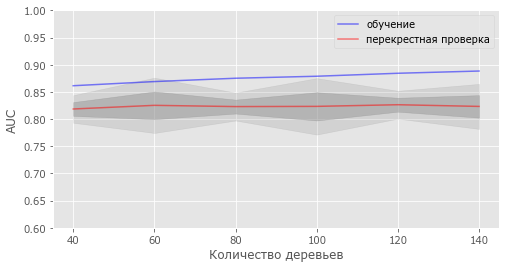

In [11]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(iterations_grid, train_auc.mean(axis=1), alpha=0.5, color='blue', 
        label='обучение')
ax.plot(iterations_grid, test_auc.mean(axis=1), alpha=0.5, color='red', 
        label='перекрестная проверка')
ax.fill_between(iterations_grid, test_auc.mean(axis=1) - test_auc.std(axis=1), test_auc.mean(axis=1) + test_auc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(iterations_grid, test_auc.mean(axis=1) - 2*test_auc.std(axis=1), test_auc.mean(axis=1) + 2*test_auc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.60,1.00])
ax.set_ylabel("AUC")
ax.set_xlabel("Количество деревьев")

In [12]:
# Создаем списки для сохранения AUC на обучающей и контрольной выборках
train_auc = []
test_auc = []
temp_train_auc = []
temp_test_auc = []
learning_rate_grid = [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5]

# Строим модели с разным значением learning_rate
for learning_rate in learning_rate_grid:
    cat = CatBoostClassifier(iterations=100, learning_rate=learning_rate, random_seed=42, eval_metric='AUC')
    temp_train_auc = []
    temp_test_auc = []
    for train_index, test_index in strat.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        cat.fit(X_train, y_train)
        temp_train_auc.append(roc_auc_score(y_train, cat.predict_proba(X_train)[:, 1]))
        temp_test_auc.append(roc_auc_score(y_test, cat.predict_proba(X_test)[:, 1]))
    train_auc.append(temp_train_auc)
    test_auc.append(temp_test_auc)

# Преобразуем списки в массивы NumPy
train_auc, test_auc = np.asarray(train_auc), np.asarray(test_auc)
print("Наилучшее значение AUC перекрестной проверки равно {:.3f} и достигается при learning_rate {}".format(max(test_auc.mean(axis=1)), 
                                                        learning_rate_grid[np.argmax(test_auc.mean(axis=1))]))

Наилучшее значение AUC перекрестной проверки равно 0.826 и достигается при learning_rate 0.04


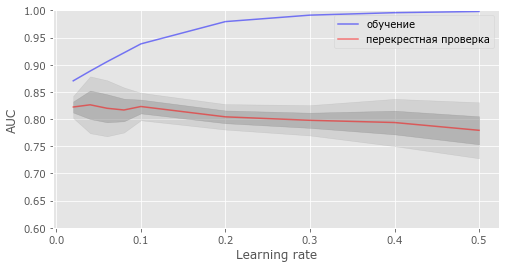

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(learning_rate_grid, train_auc.mean(axis=1), alpha=0.5, color='blue', label='обучение')
ax.plot(learning_rate_grid, test_auc.mean(axis=1), alpha=0.5, color='red', label='перекрестная проверка')
ax.fill_between(learning_rate_grid, test_auc.mean(axis=1) - test_auc.std(axis=1), test_auc.mean(axis=1) + test_auc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(learning_rate_grid, test_auc.mean(axis=1) - 2*test_auc.std(axis=1), test_auc.mean(axis=1) + 2*test_auc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.60,1.00])
ax.set_ylabel("AUC")
ax.set_xlabel("Learning rate")

In [14]:
# Создаем списки для сохранения AUC на обучающей и контрольной выборках
train_auc = []
test_auc = []
temp_train_auc = []
temp_test_auc = []
depth_grid = [2, 3, 4, 5, 6, 7, 8, 9]

# Строим модели с разным значением глубины
for depth in depth_grid:
    cat = CatBoostClassifier(iterations=100, learning_rate=0.04, depth=depth, random_seed=42, eval_metric='AUC')
    temp_train_auc = []
    temp_test_auc = []
    for train_index, test_index in strat.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        cat.fit(X_train, y_train)
        temp_train_auc.append(roc_auc_score(y_train, cat.predict_proba(X_train)[:, 1]))
        temp_test_auc.append(roc_auc_score(y_test, cat.predict_proba(X_test)[:, 1]))
    train_auc.append(temp_train_auc)
    test_auc.append(temp_test_auc)

# Преобразуем списки в массивы NumPy
train_auc, test_auc = np.asarray(train_auc), np.asarray(test_auc)
print("Наилучшее значение AUC перекрестной проверки равно {:.3f} и достигается при depth {}".format(max(test_auc.mean(axis=1)), 
                                                        depth_grid[np.argmax(test_auc.mean(axis=1))]))

Наилучшее значение AUC перекрестной проверки равно 0.829 и достигается при depth 4


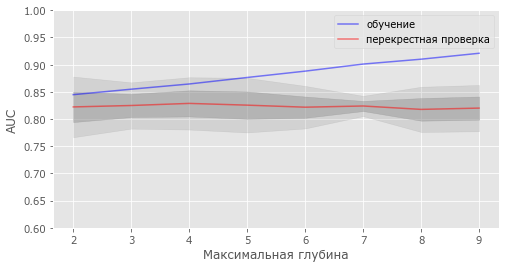

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(depth_grid, train_auc.mean(axis=1), alpha=0.5, color='blue', label='обучение')
ax.plot(depth_grid, test_auc.mean(axis=1), alpha=0.5, color='red', label='перекрестная проверка')
ax.fill_between(depth_grid, test_auc.mean(axis=1) - test_auc.std(axis=1), test_auc.mean(axis=1) + test_auc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(depth_grid, test_auc.mean(axis=1) - 2*test_auc.std(axis=1), test_auc.mean(axis=1) + 2*test_auc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.60,1.00])
ax.set_ylabel("AUC")
ax.set_xlabel("Максимальная глубина")

In [16]:
# Создаем списки для сохранения AUC на обучающей и контрольной выборках
train_auc = []
test_auc = []
temp_train_auc = []
temp_test_auc = []
rsm_grid = [0.2, 0.4, 0.6, 0.8]

# Строим модели с разным количеством признаков
for rsm in rsm_grid:
    cat = CatBoostClassifier(iterations=100, learning_rate=0.3, depth=4, rsm=rsm, random_seed=42, eval_metric='AUC')
    temp_train_auc = []
    temp_test_auc = []
    for train_index, test_index in strat.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        cat.fit(X_train, y_train)
        temp_train_auc.append(roc_auc_score(y_train, cat.predict_proba(X_train)[:, 1]))
        temp_test_auc.append(roc_auc_score(y_test, cat.predict_proba(X_test)[:, 1]))
    train_auc.append(temp_train_auc)
    test_auc.append(temp_test_auc)

# Преобразуем списки в массивы NumPy
train_auc, test_auc = np.asarray(train_auc), np.asarray(test_auc)
print("Наилучшее значение AUC перекрестной проверки равно {:.3f} и достигается при rsm {}".format(max(test_auc.mean(axis=1)), 
                                                        rsm_grid[np.argmax(test_auc.mean(axis=1))]))

Наилучшее значение AUC перекрестной проверки равно 0.816 и достигается при rsm 0.2


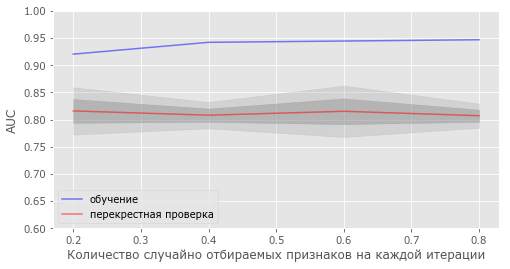

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(rsm_grid, train_auc.mean(axis=1), alpha=0.5, color='blue', label='обучение')
ax.plot(rsm_grid, test_auc.mean(axis=1), alpha=0.5, color='red', label='перекрестная проверка')
ax.fill_between(rsm_grid, test_auc.mean(axis=1) - test_auc.std(axis=1), test_auc.mean(axis=1) + test_auc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(rsm_grid, test_auc.mean(axis=1) - 2*test_auc.std(axis=1), test_auc.mean(axis=1) + 2*test_auc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.60,1.00])
ax.set_ylabel("AUC")
ax.set_xlabel("Количество случайно отбираемых признаков на каждой итерации")

In [18]:
# Создаем списки для сохранения AUC на обучающей и контрольной выборках
train_auc = []
test_auc = []
temp_train_auc = []
temp_test_auc = []
border_count_grid = [128, 192, 255]

# Строим модели с разным количеством разбиений количественных признаков
for border_count in border_count_grid:
    cat = CatBoostClassifier(iterations=100, learning_rate=0.3, depth=4, rsm=0.2, 
                             border_count=border_count, random_seed=42, eval_metric='AUC')
    temp_train_auc = []
    temp_test_auc = []
    for train_index, test_index in strat.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        cat.fit(X_train, y_train)
        temp_train_auc.append(roc_auc_score(y_train, cat.predict_proba(X_train)[:, 1]))
        temp_test_auc.append(roc_auc_score(y_test, cat.predict_proba(X_test)[:, 1]))
    train_auc.append(temp_train_auc)
    test_auc.append(temp_test_auc)

# Преобразуем списки в массивы NumPy
train_auc, test_auc = np.asarray(train_auc), np.asarray(test_auc)
print("Наилучшее значение AUC перекрестной проверки равно {:.3f} и достигается при border_count {}".format(max(test_auc.mean(axis=1)), 
                                                        border_count_grid[np.argmax(test_auc.mean(axis=1))]))

Наилучшее значение AUC перекрестной проверки равно 0.814 и достигается при border_count 255


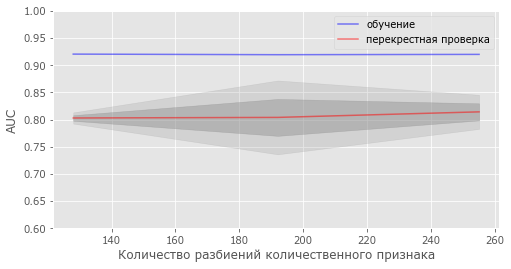

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(border_count_grid, train_auc.mean(axis=1), alpha=0.5, color='blue', label='обучение')
ax.plot(border_count_grid, test_auc.mean(axis=1), alpha=0.5, color='red', label='перекрестная проверка')
ax.fill_between(border_count_grid, test_auc.mean(axis=1) - test_auc.std(axis=1), test_auc.mean(axis=1) + test_auc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(border_count_grid, test_auc.mean(axis=1) - 2*test_auc.std(axis=1), test_auc.mean(axis=1) + 2*test_auc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.60,1.00])
ax.set_ylabel("AUC")
ax.set_xlabel("Количество разбиений количественного признака")

In [20]:
from sklearn.model_selection import GridSearchCV
cat = CatBoostClassifier(iterations=100, random_seed=42, eval_metric='AUC')
param_grid = {'learning_rate': [0.02, 0.04, 0.06, 0.08, 1], 'depth':[4, 5, 6], 'rsm':[0.4, 0.6], 
              'border_count':[128, 192, 255]}
grid_search = GridSearchCV(cat, param_grid, scoring='roc_auc', n_jobs=-1, cv=strat)
grid_search.fit(X_train, y_train)
test_score = roc_auc_score(y_control, grid_search.predict_proba(X_control)[:, 1])
print("AUC на тестовой выборке: {:.2f}".format(test_score))
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение AUC: {:.2f}".format(grid_search.best_score_))

AUC на тестовой выборке: 0.87
Наилучшие значения параметров: {'border_count': 128, 'depth': 4, 'learning_rate': 0.08, 'rsm': 0.6}
Наилучшее значение AUC: 0.83
